<a href="https://colab.research.google.com/github/abhi99-ut/aih/blob/feature%2Fhrp/hrp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

# Access data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from xgboost import XGBClassifier, plot_importance

In [3]:

auth.authenticate_user()

In [4]:
# Set your project ID here
project_id = "learning-bot-282500"
client = bigquery.Client(project=project_id)

In [5]:
query = """
select * from high_risk_project.hcup

"""

In [6]:
df = client.query(query).to_dataframe()

In [7]:
included_features = ['DIED',
                     'AGE',
                     'TOTCHG',
                     'PAY1',
                     'TRAN_IN',
                     'TRAN_OUT',
                     'ELECTIVE',
                     'FEMALE',
                     'AMONTH',
                     'AWEEKEND',
                     'HOSP_DIVISION',
                     'PL_NCHS',
                     'RACE',
                     'HOSP_BEDSIZE',
                     'HOSP_LOCTEACH',
                     'HOSP_REGION',
                     'STROKE',
                     'NIHSSREPORT',
                     'afib',
                     'CHF',
                     'DM',
                     'HTN',
                     'htn_crisis',
                     'primary_htn',
                     'CKD',
                     'oldMI',
                     'evtrace',
                     'teach',
                     'size',
                     'smoking',
                     'ZIPINC_QRTL'
                     ]

In [8]:


df.columns.tolist()

['AGE',
 'AGE_NEONATE',
 'AMONTH',
 'AWEEKEND',
 'DIED',
 'DISCWT',
 'DISPUNIFORM',
 'DQTR',
 'DRG',
 'DRGVER',
 'DRG_NoPOA',
 'ELECTIVE',
 'FEMALE',
 'HCUP_ED',
 'HOSP_DIVISION',
 'HOSP_NIS',
 'I10_DX1',
 'I10_DX2',
 'I10_DX3',
 'I10_DX4',
 'I10_DX5',
 'I10_DX6',
 'I10_DX7',
 'I10_DX8',
 'I10_DX9',
 'I10_DX10',
 'I10_DX11',
 'I10_DX12',
 'I10_DX13',
 'I10_DX14',
 'I10_DX15',
 'I10_DX16',
 'I10_DX17',
 'I10_DX18',
 'I10_DX19',
 'I10_DX20',
 'I10_DX21',
 'I10_DX22',
 'I10_DX23',
 'I10_DX24',
 'I10_DX25',
 'I10_DX26',
 'I10_DX27',
 'I10_DX28',
 'I10_DX29',
 'I10_DX30',
 'I10_NDX',
 'I10_NPR',
 'I10_PR1',
 'I10_PR2',
 'I10_PR3',
 'I10_PR4',
 'I10_PR5',
 'I10_PR6',
 'I10_PR7',
 'I10_PR8',
 'I10_PR9',
 'I10_PR10',
 'I10_PR11',
 'I10_PR12',
 'I10_PR13',
 'I10_PR14',
 'I10_PR15',
 'KEY_NIS',
 'LOS',
 'MDC',
 'MDC_NoPOA',
 'NIS_STRATUM',
 'PAY1',
 'PL_NCHS',
 'PRDAY1',
 'PRDAY2',
 'PRDAY3',
 'PRDAY4',
 'PRDAY5',
 'PRDAY6',
 'PRDAY7',
 'PRDAY8',
 'PRDAY9',
 'PRDAY10',
 'PRDAY11',
 'PRDAY12',
 '

In [9]:
df.STROKE.unique()

<IntegerArray>
[1]
Length: 1, dtype: Int64

In [10]:

#file_path ="/content/drive/MyDrive/stroke/nis_stroke_nihss.csv"

### Read data set

In [11]:
#df = pd.read_csv(file_path,low_memory = False)

In [12]:
df.head()

,AGE,AGE_NEONATE,AMONTH,AWEEKEND,DIED,DISCWT,DISPUNIFORM,DQTR,DRG,DRGVER,DRG_NoPOA,ELECTIVE,FEMALE,HCUP_ED,HOSP_DIVISION,HOSP_NIS,I10_DX1,I10_DX2,I10_DX3,I10_DX4,I10_DX5,I10_DX6,I10_DX7,I10_DX8,I10_DX9,I10_DX10,I10_DX11,I10_DX12,I10_DX13,I10_DX14,I10_DX15,I10_DX16,I10_DX17,I10_DX18,I10_DX19,I10_DX20,I10_DX21,I10_DX22,I10_DX23,I10_DX24,I10_DX25,I10_DX26,I10_DX27,I10_DX28,I10_DX29,I10_DX30,I10_NDX,I10_NPR,I10_PR1,I10_PR2,I10_PR3,I10_PR4,I10_PR5,I10_PR6,I10_PR7,I10_PR8,I10_PR9,I10_PR10,I10_PR11,I10_PR12,I10_PR13,I10_PR14,I10_PR15,KEY_NIS,LOS,MDC,MDC_NoPOA,NIS_STRATUM,PAY1,PL_NCHS,PRDAY1,PRDAY2,PRDAY3,PRDAY4,PRDAY5,PRDAY6,PRDAY7,PRDAY8,PRDAY9,PRDAY10,PRDAY11,PRDAY12,PRDAY13,PRDAY14,PRDAY15,RACE,TOTCHG,TRAN_IN,TRAN_OUT,YEAR,ZIPINC_QRTL,APRDRG,APRDRG_Risk_Mortality,APRDRG_Severity,HOSP_BEDSIZE,HOSP_LOCTEACH,HOSP_REGION,H_CONTRL,N_DISC_U,N_HOSP_U,S_DISC_U,S_HOSP_U,TOTAL_DISC,STROKE,NIHSSREPORT,NIHSS,MT,TPA,afib,smoking,CHF,DM,HLD,HTN,htn_crisis,primary_htn,CKD,oldMI,CAD,evtrace,teach,size,mild
0,59,None,10,0,0,4.999926,1,4,252,34,252,0,0,1,3,30587,I70361,T8112XA,I638,K7200,J95821,G92,A419,E43,K810,E1152,E2740,T814XXA,L97819,I97821,D62,G8194,N99840,M6282,E1142,E1165,E1140,I10,L409,E7800,F319,None,None,None,None,None,25,11,041K0JN,5A1955Z,0BH17EZ,0F9430Z,0W9G30Z,05HM33Z,B513ZZA,30233N1,02HV33Z,B518ZZA,30233K1,None,None,None,None,30327313,26,5,5,3331,1,1,2,6,6,13,16,6,6,2,15,15,10,<NA>,<NA>,<NA>,<NA>,2,333473,0,0,2016,1,181,4,4,1,3,2,3,136033,17,27207,17,1735,1,0,<NA>,0,0,0,0,0,1,1,1,0,1,0,0,0,2,2,1,2
1,59,None,12,0,0,4.999926,5,4,61,34,61,0,1,0,3,30563,I63511,J9691,G936,N179,J189,J95811,R1319,E46,I5022,I481,R0489,T82838A,G8194,J9382,I959,I10,F17210,I482,E119,F17200,G510,R471,K449,K209,Z9119,Z9114,Z713,Z86718,Z7901,None,29,11,3E03317,0DH673Z,0DH63UZ,0W9930Z,0BJ08ZZ,0DJ08ZZ,3E0G76Z,02HV33Z,B548ZZA,0BH17EZ,5A1945Z,None,None,None,None,30352898,14,1,1,3331,3,1,0,4,0,0,0,0,0,4,4,0,0,<NA>,<NA>,<NA>,<NA>,1,<NA>,0,2,2016,1,951,4,4,1,3,2,3,136033,17,27207,17,2712,1,0,<NA>,0,1,1,0,1,1,0,1,0,1,0,0,0,1,2,1,2
2,74,None,12,0,0,4.999926,1,4,37,34,37,0,1,0,3,30231,I63231,I214,N179,I130,I5022,L7632,Q211,J9811,I2510,Z955,I739,Z7902,J45909,Z87891,E785,E1122,N183,Z8249,Z9282,Z7982,R001,D631,R197,E1165,Z794,None,None,None,None,None,25,11,03CK0ZZ,03UK0JZ,0W360ZZ,30233N1,4A023N7,B2111ZZ,B2151ZZ,05H733Z,B54MZZA,02HV33Z,B548ZZA,None,None,None,None,30608562,12,1,1,3331,1,1,8,8,8,8,2,2,2,7,7,8,8,<NA>,<NA>,<NA>,<NA>,2,<NA>,1,0,2016,1,24,3,3,1,3,2,3,136033,17,27207,17,3268,1,0,<NA>,0,0,0,0,1,1,1,1,0,0,1,0,1,2,2,1,2
3,57,None,11,1,0,4.999926,5,4,23,34,23,0,1,0,3,30563,I63411,N186,G936,I120,E870,A047,D696,K592,G8194,R414,D638,F319,A539,R29810,R112,R569,H5347,R410,E785,J449,S301XXA,R32,E875,I672,N319,I6521,Z781,Z992,Z7901,Z7902,30,14,03CH3ZZ,03CK3ZZ,037K3ZZ,037H3ZZ,B3131ZZ,B3161ZZ,3E03317,30233N1,5A1D60Z,02HV33Z,B548ZZA,05HA33Z,B54NZZA,4A00X4Z,None,30833755,26,1,1,3331,1,1,2,2,2,2,2,2,0,2,0,1,1,5,5,12,<NA>,2,<NA>,0,2,2016,1,24,3,3,1,3,2,3,136033,17,27207,17,2712,1,0,<NA>,0,1,0,0,0,0,1,1,0,0,1,0,0,2,2,1,2
4,82,None,10,0,0,5.000037,6,4,270,34,270,1,0,0,9,90472,I70321,G9340,I639,I5022,N179,R4701,J9811,I7092,I70221,F0390,I255,N181,E1122,I129,G40909,R791,I4891,I252,L97519,D7582,E8770,Z66,Z951,Z95810,None,None,None,None,None,None,24,14,04CK3ZZ,04CK3ZZ,041K09N,05BY0ZZ,04WY0JZ,047K3ZZ,04WY07Z,047R3ZZ,B44FZZ3,B41F1ZZ,B4101ZZ,0BH17EZ,5A1945Z,B41F1ZZ,None,90382428,9,5,5,9222,1,3,0,0,0,0,0,0,0,1,0,-1,-1,0,0,1,<NA>,1,662518,0,0,2016,1,181,4,4,2,2,4,2,274297,41,54859,41,1387,1,0,<NA>,0,0,1,0,1,0,0,1,0,0,1,1,0,1,1,1,2


<ipython-input-13-7bbed663879a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_var, y='DIED', data=df, ci=None)


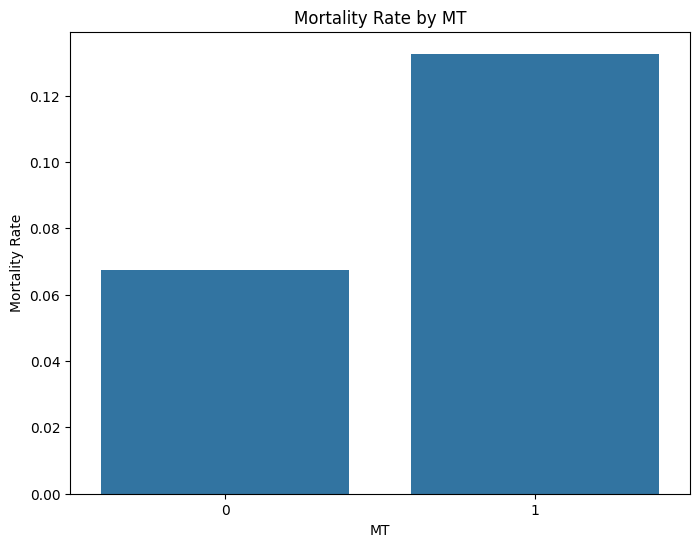

<ipython-input-13-7bbed663879a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_var, y='DIED', data=df, ci=None)


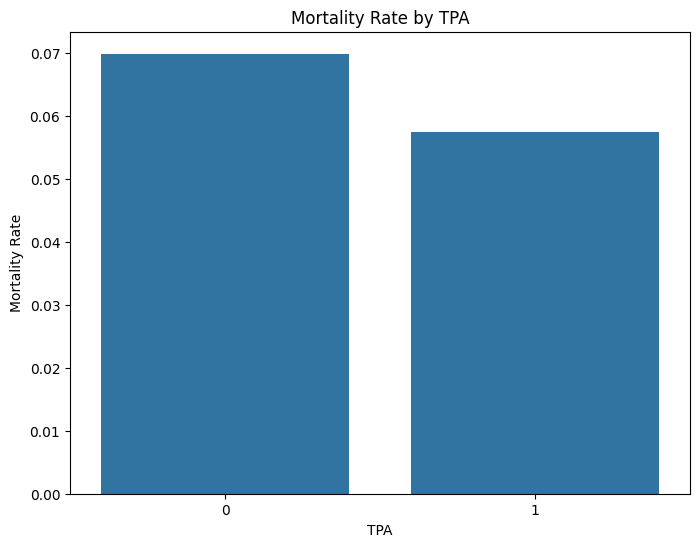

<ipython-input-13-7bbed663879a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_var, y='DIED', data=df, ci=None)


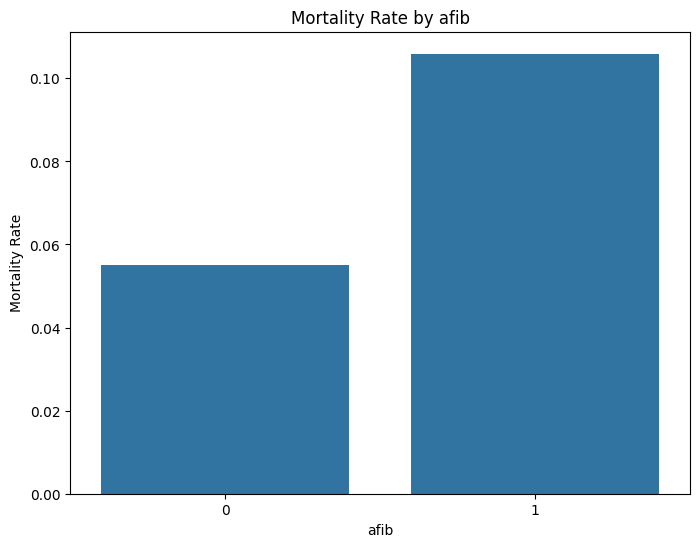

<ipython-input-13-7bbed663879a>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_var, y='DIED', data=df, ci=None)


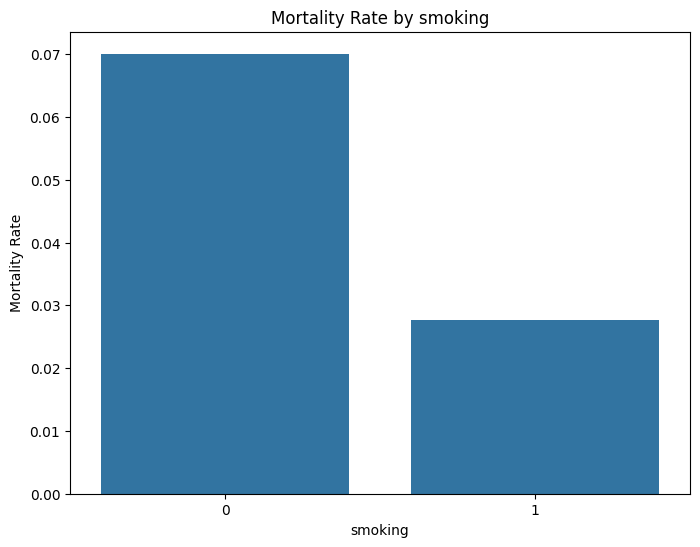

In [13]:
# List of variables to iterate over
x_var_list = ['MT', 'TPA', 'afib', 'smoking']

# Loop through the variables and create bar plots
for x_var in x_var_list:
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    sns.barplot(x=x_var, y='DIED', data=df, ci=None)
    plt.title(f"Mortality Rate by {x_var}")
    plt.xlabel(x_var)
    plt.ylabel("Mortality Rate")
    plt.show()


In [14]:
## drg, DRGVER ,DRG_NoPOA, is assigned during discharge
df.YEAR.unique()

<IntegerArray>
[2016, 2017]
Length: 2, dtype: Int64

In [15]:
## ELECTIVE: if admission to the hospital was elective.
## HOSP_DIVISION

In [16]:
df['DRG'].value_counts()

,count
DRG,
65,17667
64,9135
66,6629
62,1834
871,1171
...,...
894,1
300,1
2,1


In [17]:
## get prior and 1st day procedure
df.shape

(49999, 123)

In [18]:
df.I10_PR1.unique()

array(['041K0JN', '3E03317', '03CK0ZZ', ..., '041K09N', '04HL33Z',
       '0NBT0ZZ'], dtype=object)

data discription: https://hcup-us.ahrq.gov/db/nation/nis/nisdde.jsp

AGE_NEONATE: Neonatal age (first 28 days after birth) indicator



In [19]:
df= df[included_features]

### EDA

In [20]:
df.shape

(49999, 31)

In [21]:
df['DIED'].value_counts()/df.shape[0]

,count
DIED,
0,0.929639
1,0.068901


In [22]:
t =pd.DataFrame(df.dtypes)
t.to_csv("t.csv")

In [23]:
### base line
df.columns.tolist()


['DIED',
 'AGE',
 'TOTCHG',
 'PAY1',
 'TRAN_IN',
 'TRAN_OUT',
 'ELECTIVE',
 'FEMALE',
 'AMONTH',
 'AWEEKEND',
 'HOSP_DIVISION',
 'PL_NCHS',
 'RACE',
 'HOSP_BEDSIZE',
 'HOSP_LOCTEACH',
 'HOSP_REGION',
 'STROKE',
 'NIHSSREPORT',
 'afib',
 'CHF',
 'DM',
 'HTN',
 'htn_crisis',
 'primary_htn',
 'CKD',
 'oldMI',
 'evtrace',
 'teach',
 'size',
 'smoking',
 'ZIPINC_QRTL']

In [24]:
# Overview of the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (49999, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   DIED           49926 non-null  Int64
 1   AGE            49999 non-null  Int64
 2   TOTCHG         49466 non-null  Int64
 3   PAY1           49927 non-null  Int64
 4   TRAN_IN        49796 non-null  Int64
 5   TRAN_OUT       49926 non-null  Int64
 6   ELECTIVE       49897 non-null  Int64
 7   FEMALE         49975 non-null  Int64
 8   AMONTH         49858 non-null  Int64
 9   AWEEKEND       49999 non-null  Int64
 10  HOSP_DIVISION  49999 non-null  Int64
 11  PL_NCHS        49801 non-null  Int64
 12  RACE           49654 non-null  Int64
 13  HOSP_BEDSIZE   49999 non-null  Int64
 14  HOSP_LOCTEACH  49999 non-null  Int64
 15  HOSP_REGION    49999 non-null  Int64
 16  STROKE         49999 non-null  Int64
 17  NIHSSREPORT    49999 non-null  Int64
 18  afib


Target Variable Distribution:
DIED
0    0.930998
1    0.069002
Name: proportion, dtype: Float64


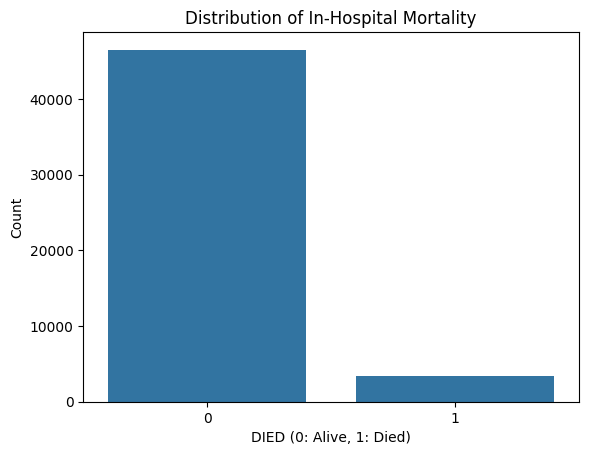

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of DIED
print("\nTarget Variable Distribution:")
print(df['DIED'].value_counts(normalize=True))

# Plot
sns.countplot(x='DIED', data=df)
plt.title("Distribution of In-Hospital Mortality")
plt.xlabel("DIED (0: Alive, 1: Died)")
plt.ylabel("Count")
plt.show()


In [1]:
df.DIED

NameError: name 'df' is not defined

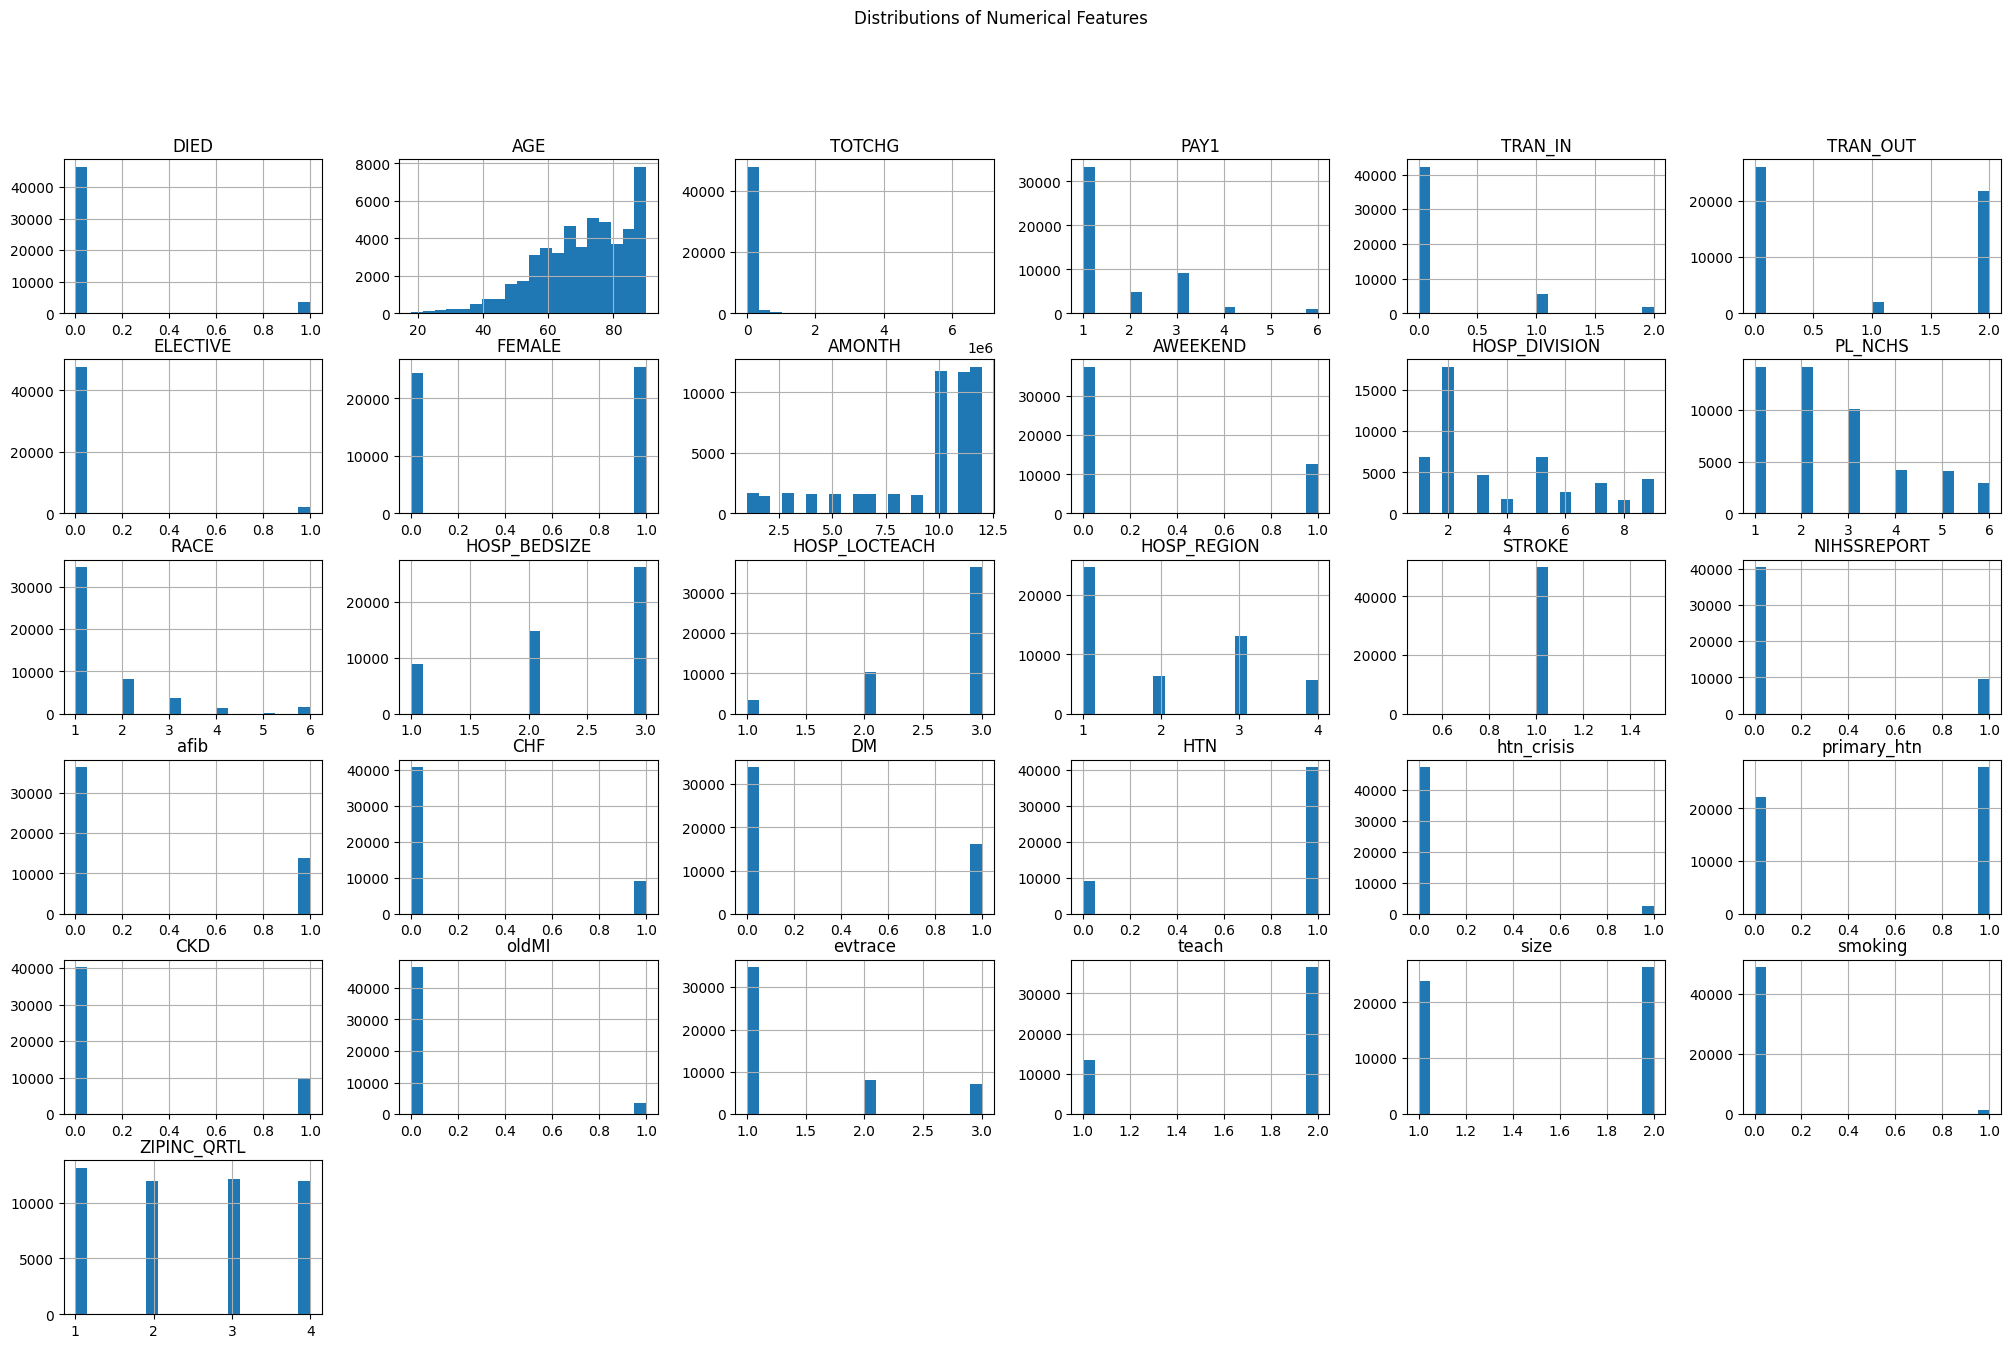

In [26]:
# Histograms for all numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(bins=20, figsize=(25, 15))
plt.suptitle("Distributions of Numerical Features")
plt.show()


In [27]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index([], dtype='object')

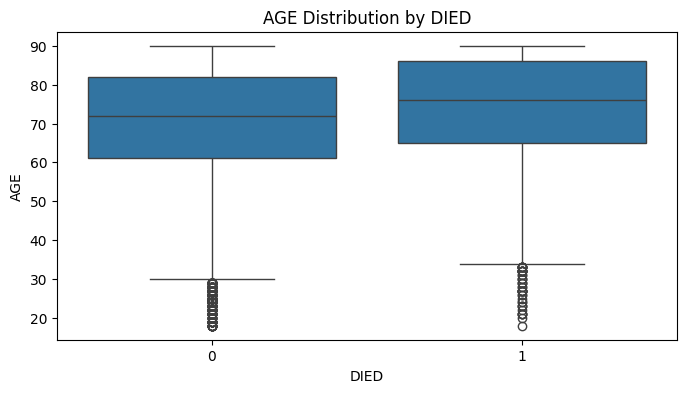

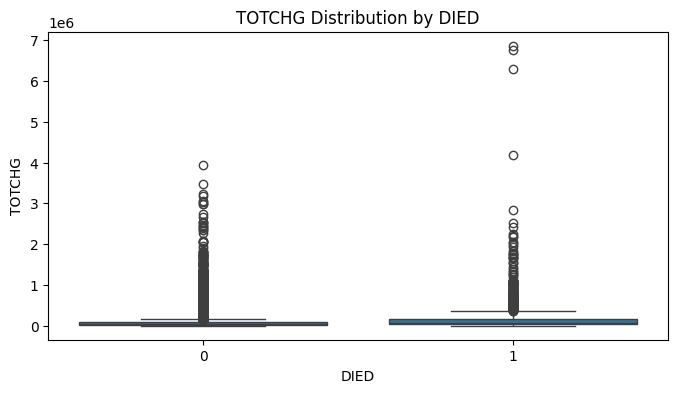

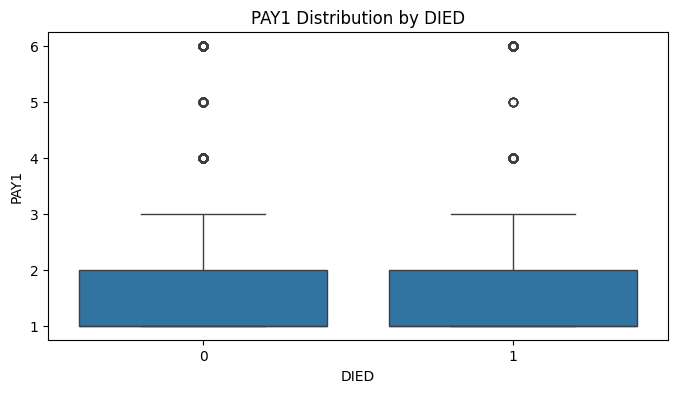

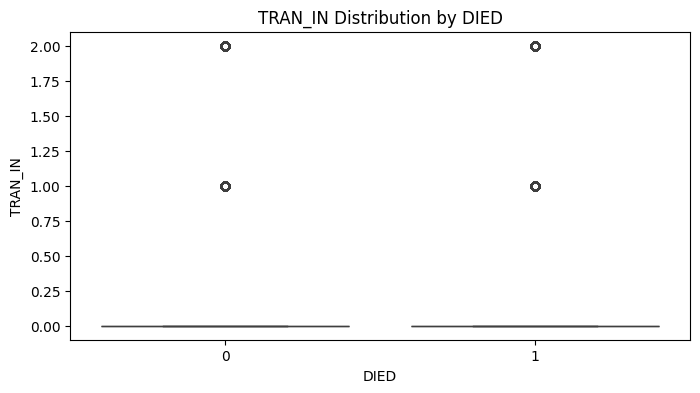

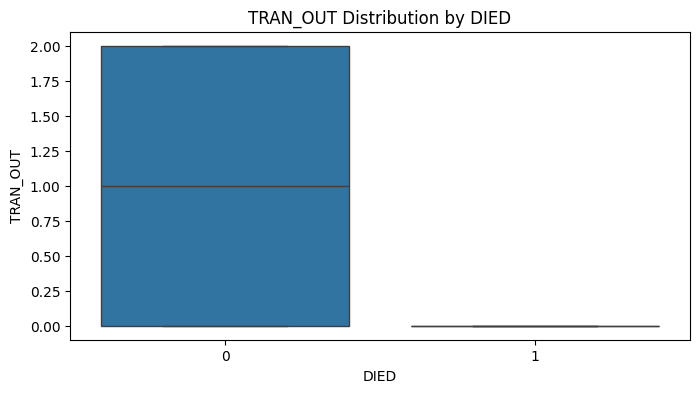

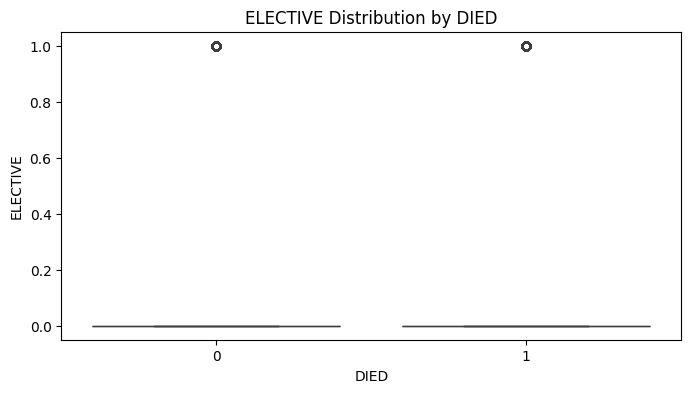

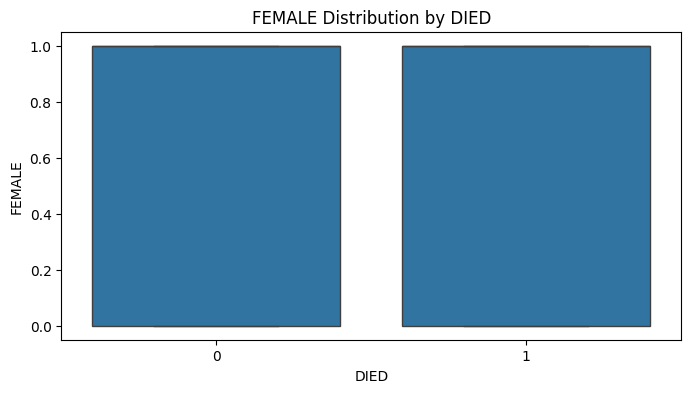

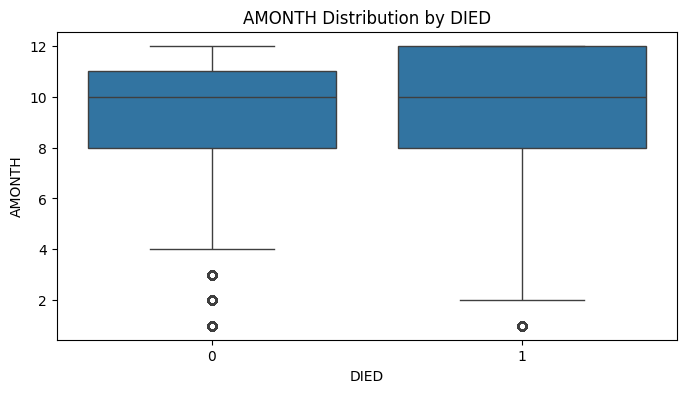

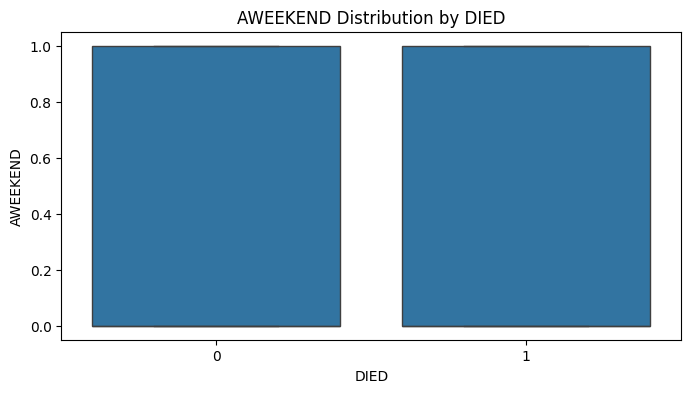

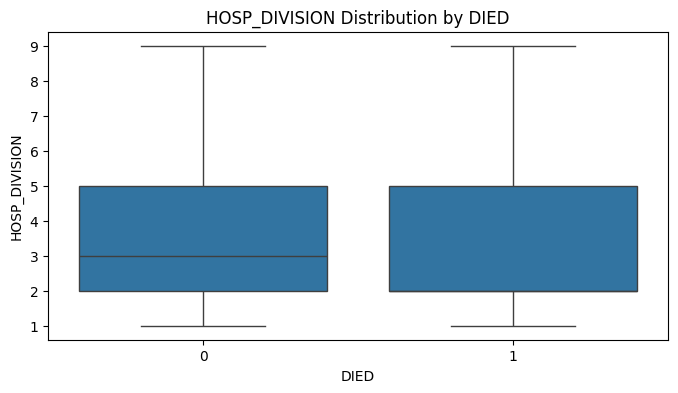

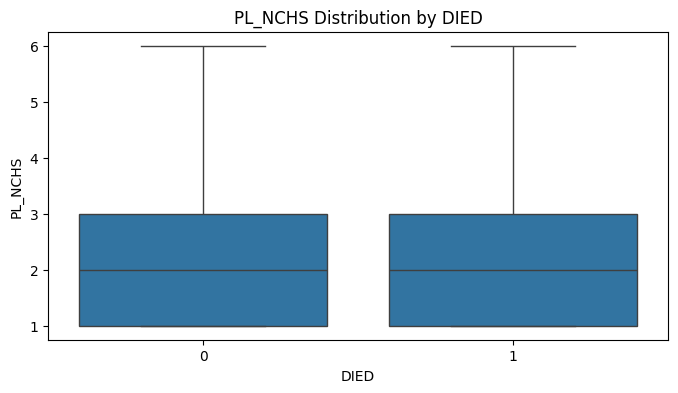

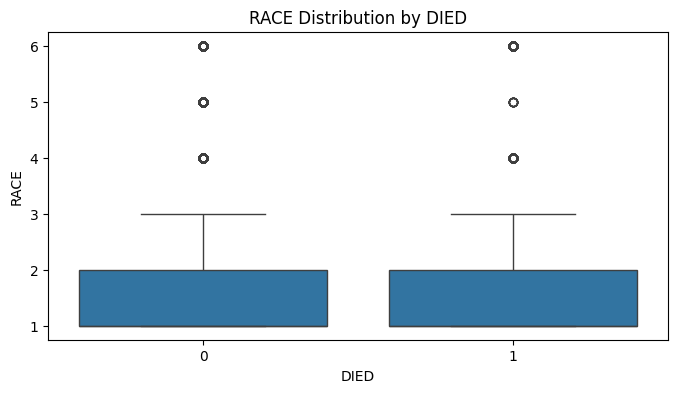

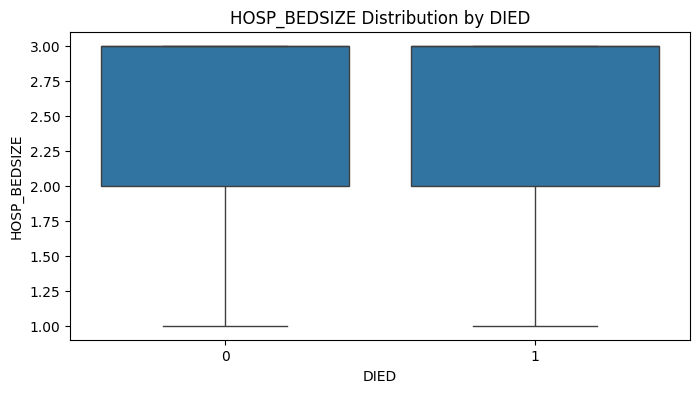

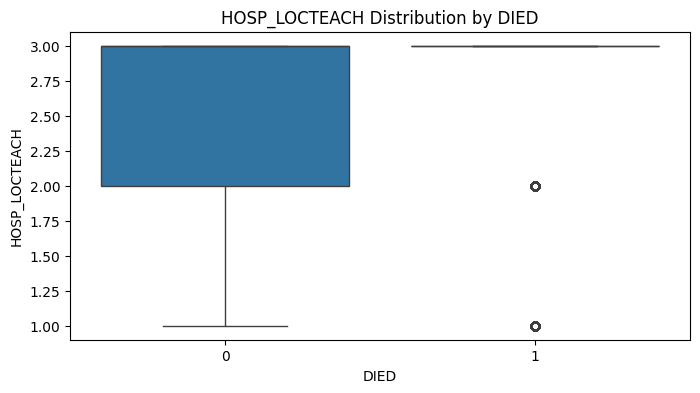

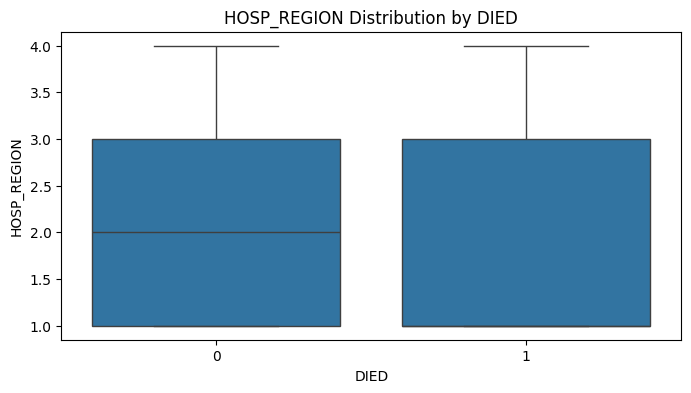

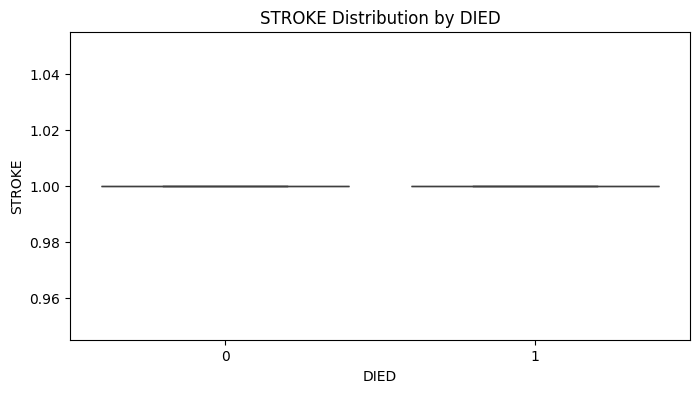

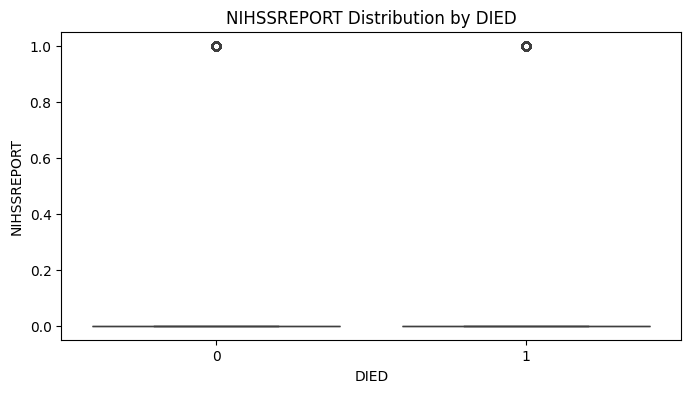

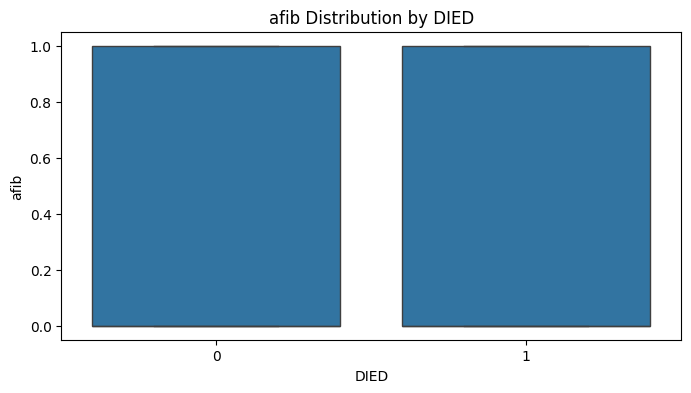

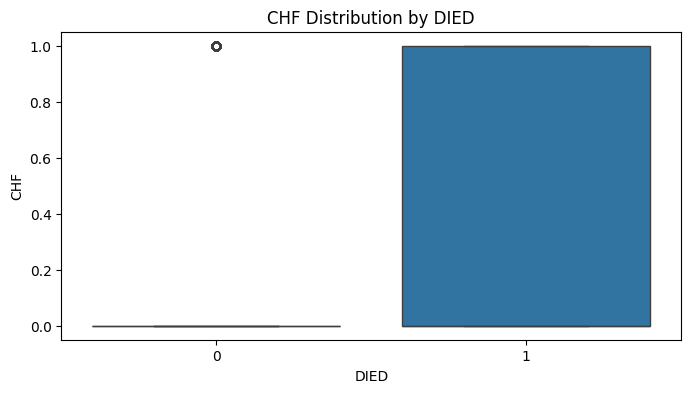

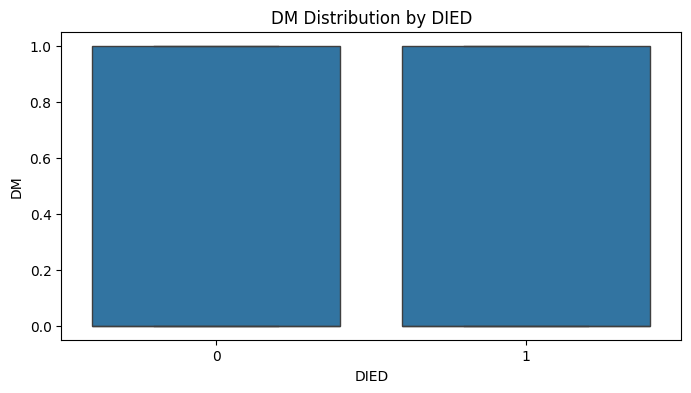

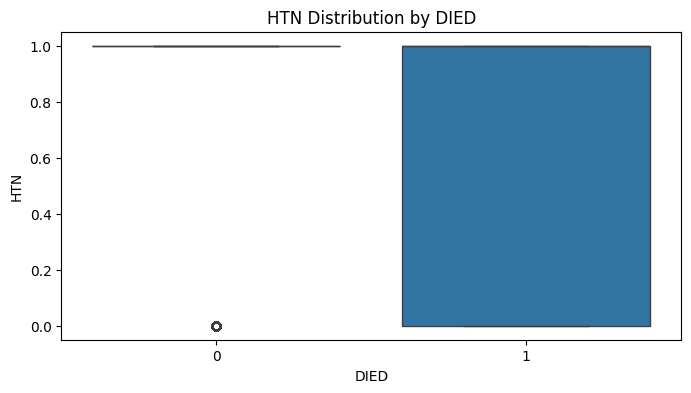

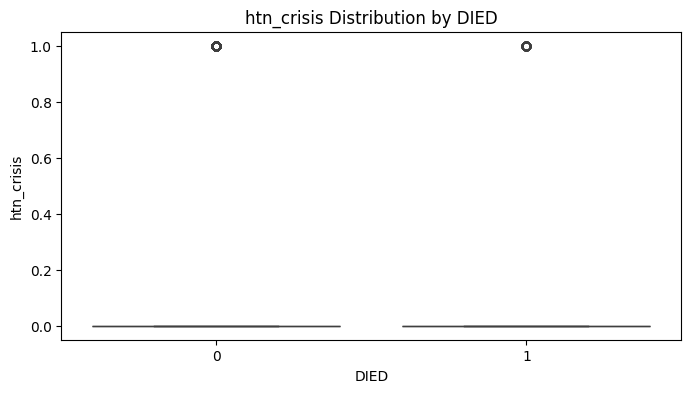

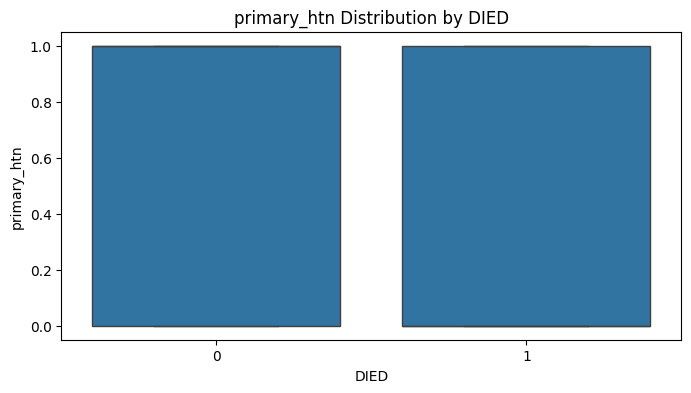

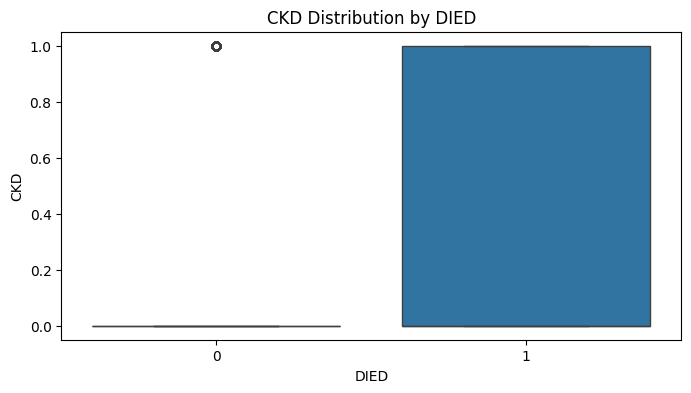

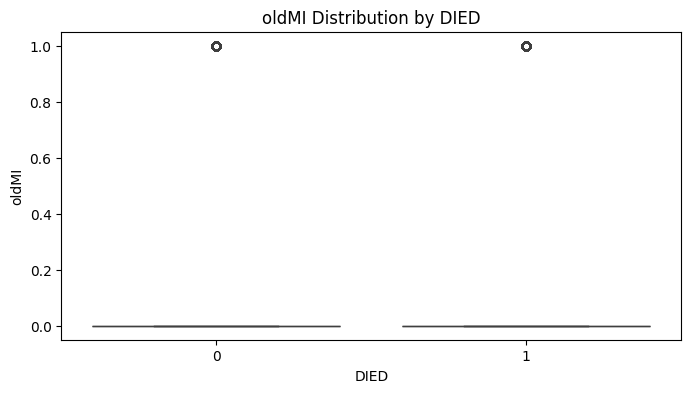

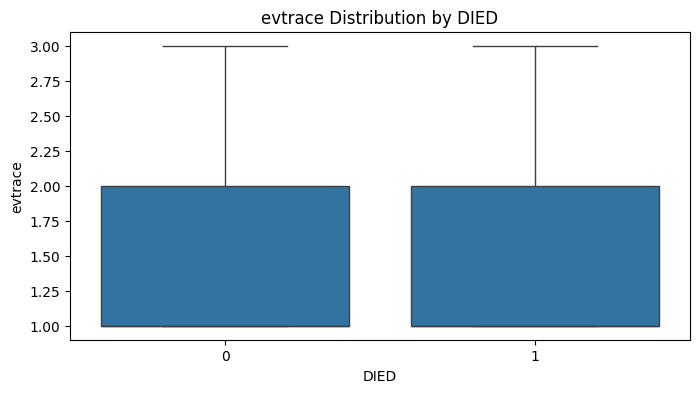

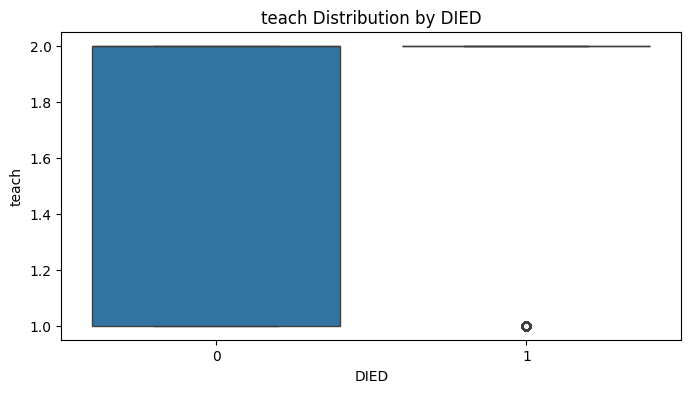

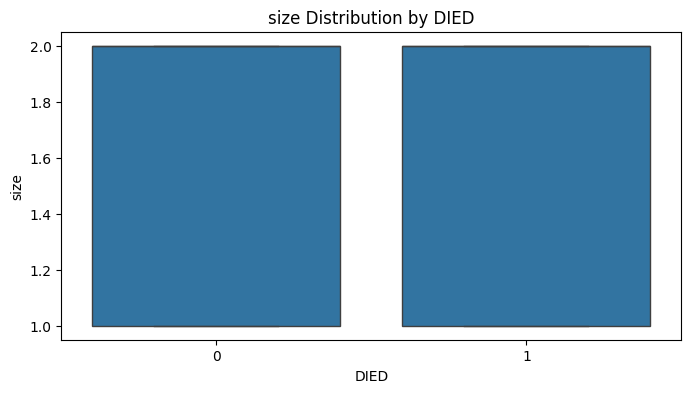

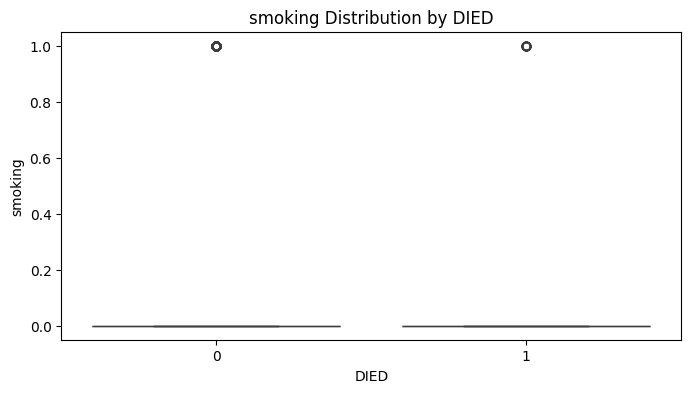

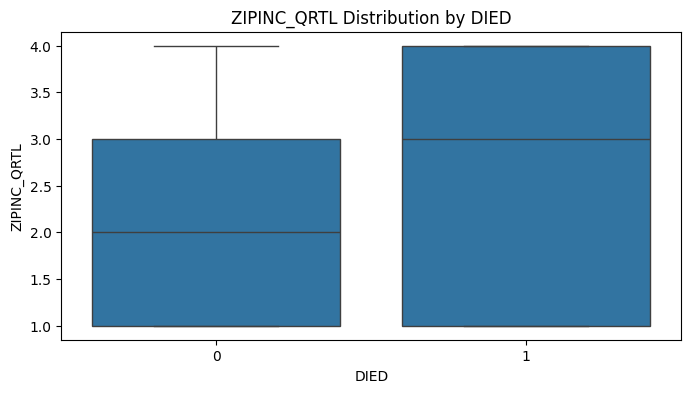

In [28]:
# Boxplots for numerical features vs DIED
for col in numerical_cols:
    if col != 'DIED':  # Exclude the target
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='DIED', y=col, data=df)
        plt.title(f"{col} Distribution by DIED")
        plt.show()


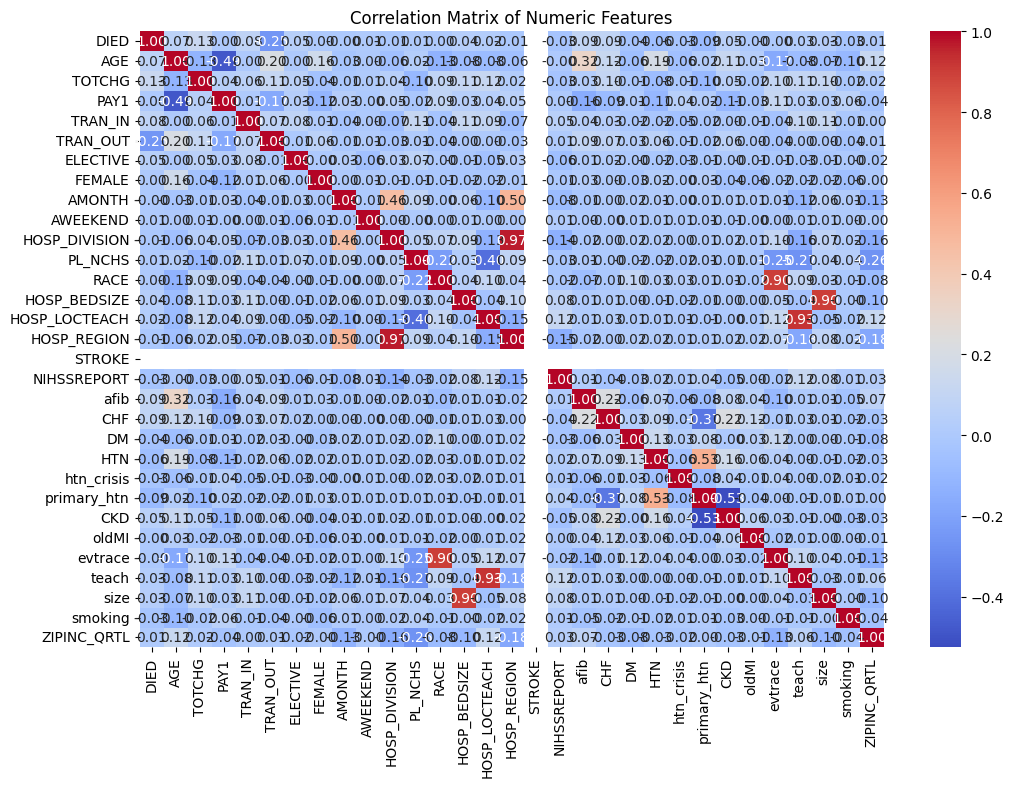

In [29]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap for numeric correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


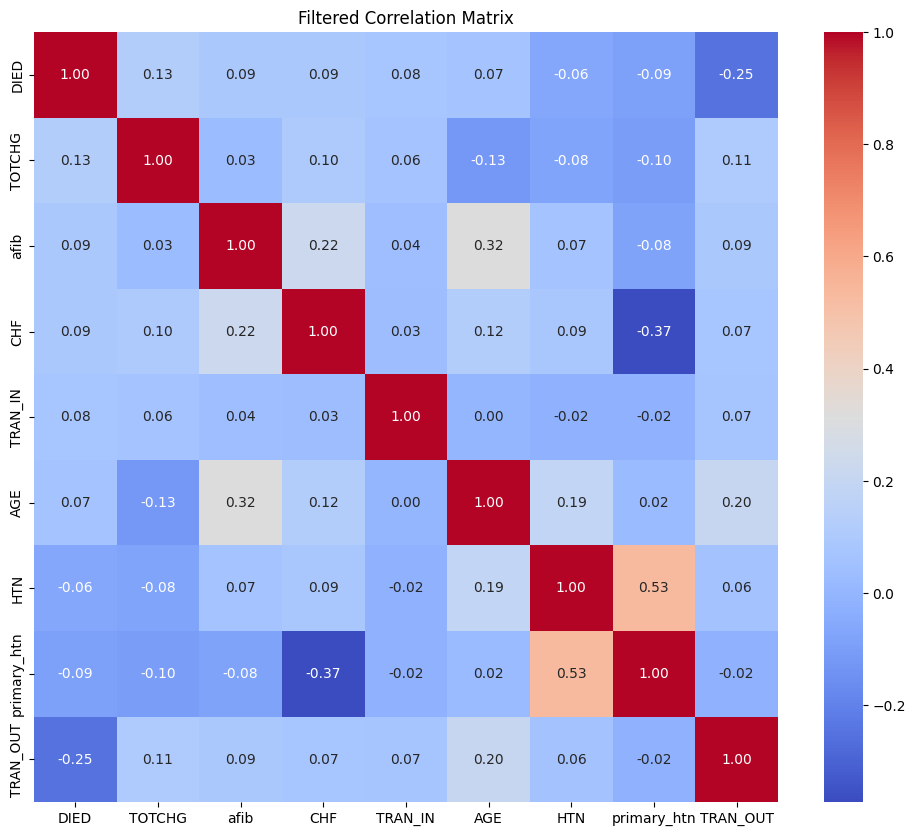

In [30]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlations with the target variable 'DIED'
correlations = numeric_df.corr()['DIED'].sort_values(ascending=False)

# Select top features with the strongest correlation (positive or negative)
top_features = correlations[abs(correlations) > 0.05].index  # Adjust threshold if necessary

# Create a filtered correlation matrix
filtered_corr_matrix = numeric_df[top_features].corr()

# Plot the heatmap with larger size
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Increase plot size
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Filtered Correlation Matrix")
plt.show()


<ipython-input-31-6e8df06a5cd2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_stats = df.groupby('age_bin').agg(


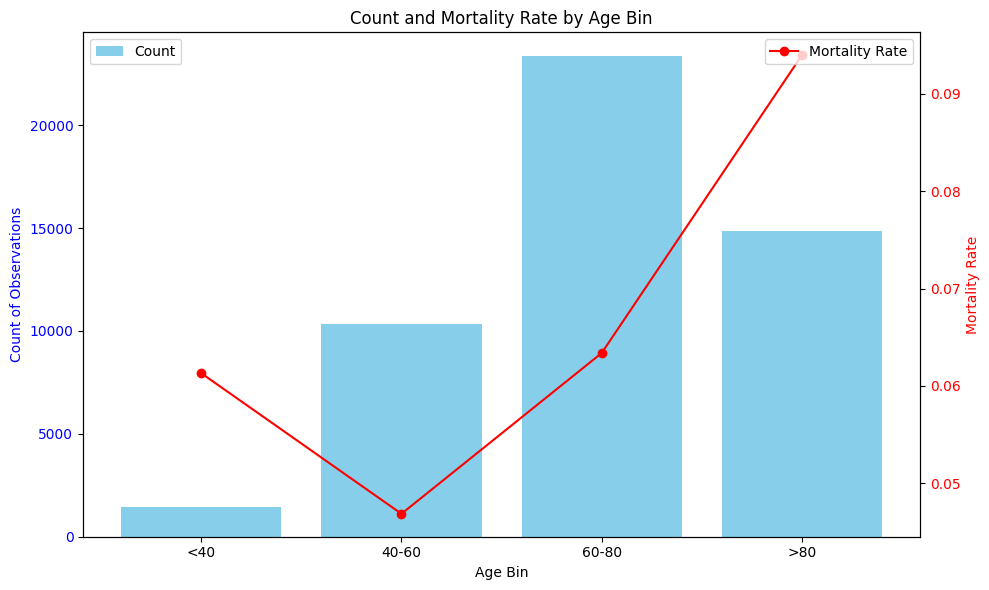

In [31]:
# Bin age into specified ranges
df['age_bin'] = pd.cut(df['AGE'], bins=[0, 40, 60, 80, 120], labels=['<40', '40-60', '60-80', '>80'])

# Calculate counts and mortality rate
age_bin_stats = df.groupby('age_bin').agg(
    count=('DIED', 'size'),  # Count of observations
    mortality_rate=('DIED', 'mean')  # Mortality rate
).reset_index()

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot count on the primary y-axis
ax1.bar(age_bin_stats['age_bin'], age_bin_stats['count'], color='skyblue', label='Count')
ax1.set_xlabel("Age Bin")
ax1.set_ylabel("Count of Observations", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot mortality rate on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(age_bin_stats['age_bin'], age_bin_stats['mortality_rate'], color='red', marker='o', label='Mortality Rate')
ax2.set_ylabel("Mortality Rate", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title("Count and Mortality Rate by Age Bin")
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


### Experiment

In [32]:
df

,DIED,AGE,TOTCHG,PAY1,TRAN_IN,TRAN_OUT,ELECTIVE,FEMALE,AMONTH,AWEEKEND,HOSP_DIVISION,PL_NCHS,RACE,HOSP_BEDSIZE,HOSP_LOCTEACH,HOSP_REGION,STROKE,NIHSSREPORT,afib,CHF,DM,HTN,htn_crisis,primary_htn,CKD,oldMI,evtrace,teach,size,smoking,ZIPINC_QRTL,age_bin
0,0,59,333473,1,0,0,0,0,10,0,3,1,2,1,3,2,1,0,0,0,1,1,0,1,0,0,2,2,1,0,1,40-60
1,0,59,<NA>,3,0,2,0,1,12,0,3,1,1,1,3,2,1,0,1,1,1,1,0,1,0,0,1,2,1,0,1,40-60
2,0,74,<NA>,1,1,0,0,1,12,0,3,1,2,1,3,2,1,0,0,1,1,1,0,0,1,0,2,2,1,0,1,60-80
3,0,57,<NA>,1,0,2,0,1,11,1,3,1,2,1,3,2,1,0,0,0,0,1,0,0,1,0,2,2,1,0,1,40-60
4,0,82,662518,1,0,0,1,0,10,0,9,3,1,2,2,4,1,0,1,1,0,1,0,0,1,1,1,1,1,0,1,>80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,0,66,218352,1,0,2,1,0,11,0,6,6,1,3,3,3,1,0,0,0,0,0,0,0,0,0,1,2,2,0,2,60-80
49995,0,28,679418,2,1,2,0,0,12,0,6,6,1,3,3,3,1,0,0,0,0,0,0,0,0,0,1,2,2,0,1,<40
49996,1,85,177826,1,0,0,0,1,11,1,6,3,2,3,3,3,1,0,1,1,0,1,0,1,0,0,2,2,2,0,1,>80
49997,0,60,453582,2,1,2,0,0,10,1,6,5,1,3,3,3,1,0,0,0,0,0,0,0,0,0,1,2,2,0,1,40-60


In [33]:
# HOSP_NIS, NIHSS

In [34]:
included_features

['DIED',
 'AGE',
 'TOTCHG',
 'PAY1',
 'TRAN_IN',
 'TRAN_OUT',
 'ELECTIVE',
 'FEMALE',
 'AMONTH',
 'AWEEKEND',
 'HOSP_DIVISION',
 'PL_NCHS',
 'RACE',
 'HOSP_BEDSIZE',
 'HOSP_LOCTEACH',
 'HOSP_REGION',
 'STROKE',
 'NIHSSREPORT',
 'afib',
 'CHF',
 'DM',
 'HTN',
 'htn_crisis',
 'primary_htn',
 'CKD',
 'oldMI',
 'evtrace',
 'teach',
 'size',
 'smoking',
 'ZIPINC_QRTL']

In [35]:
training_features = ['AGE',
                     'PAY1',
 'TRAN_IN',
 'ELECTIVE',
 'FEMALE',
 'AMONTH',
 'AWEEKEND',
 'HOSP_DIVISION',
 'PL_NCHS',
 'RACE',
 'HOSP_BEDSIZE',
 'HOSP_LOCTEACH',
 'HOSP_REGION',
 'STROKE',
 'NIHSSREPORT',
 'afib',
 'CHF',
 'DM',
 'HTN',
 'htn_crisis',
 'primary_htn',
 'CKD',
 'oldMI',
 'evtrace',
 'teach',
 'size',
 'smoking',
 'ZIPINC_QRTL']

In [36]:
training_features

['AGE',
 'PAY1',
 'TRAN_IN',
 'ELECTIVE',
 'FEMALE',
 'AMONTH',
 'AWEEKEND',
 'HOSP_DIVISION',
 'PL_NCHS',
 'RACE',
 'HOSP_BEDSIZE',
 'HOSP_LOCTEACH',
 'HOSP_REGION',
 'STROKE',
 'NIHSSREPORT',
 'afib',
 'CHF',
 'DM',
 'HTN',
 'htn_crisis',
 'primary_htn',
 'CKD',
 'oldMI',
 'evtrace',
 'teach',
 'size',
 'smoking',
 'ZIPINC_QRTL']

In [37]:



# Create a contingency table for TRAN_IN and DIED
contingency_table_in = pd.crosstab(df['TRAN_IN'], df['DIED'])

# Perform Chi-Square test
chi2_in, p_in, dof_in, ex_in = chi2_contingency(contingency_table_in)
print(f"Chi-Square Test between TRAN_IN and DIED: p-value = {p_in:.4f}")

# Create a contingency table for TRAN_OUT and DIED
contingency_table_out = pd.crosstab(df['TRAN_OUT'], df['DIED'])

# Perform Chi-Square test
chi2_out, p_out, dof_out, ex_out = chi2_contingency(contingency_table_out)
print(f"Chi-Square Test between TRAN_OUT and DIED: p-value = {p_out:.4f}")


Chi-Square Test between TRAN_IN and DIED: p-value = 0.0000
Chi-Square Test between TRAN_OUT and DIED: p-value = 0.0000


In [38]:
contingency_table_out

DIED,0,1
TRAN_OUT,,
0,22714,3445
1,1975,0
2,21792,0


In [39]:
x_cols = training_features
y_col = ['DIED']

In [40]:
missing_summary = df[['ZIPINC_QRTL', 'HTN']].isnull().sum()
print(missing_summary)

ZIPINC_QRTL    846
HTN              0
dtype: int64


In [41]:
df = df[~df['DIED'].isna()].reset_index(drop=True)
# Handle missing values
df['ZIPINC_QRTL'] = df['ZIPINC_QRTL'].fillna(df['ZIPINC_QRTL'].mode()[0])
df['HTN'] = df['HTN'].fillna(0)
df['DM'] = df['DM'].fillna(0)  # Example for other interactions

# Create interaction features
df['HTN_CKD'] = df['HTN'] & df['CKD']  # Logical interaction
df['AGE_HTN'] = df['AGE'] * df['HTN']
df['LowIncome_HTN'] = ((df['ZIPINC_QRTL'] == 1) & (df['HTN'] == 1)).astype(int)
df['LowIncome_DM'] = ((df['ZIPINC_QRTL'] == 1) & (df['DM'] == 1)).astype(int)


In [42]:
TOTCHG_imputer = SimpleImputer(strategy='median')
df['TOTCHG'] = TOTCHG_imputer.fit_transform(df[['TOTCHG']])


In [43]:
df['TOTCHG'].isna().sum()/df.shape[0]

0.0

In [44]:
training_features.extend(['HTN_CKD','AGE_HTN','LowIncome_HTN','LowIncome_DM','age_bin'])

In [45]:
df

,DIED,AGE,TOTCHG,PAY1,TRAN_IN,TRAN_OUT,ELECTIVE,FEMALE,AMONTH,AWEEKEND,HOSP_DIVISION,PL_NCHS,RACE,HOSP_BEDSIZE,HOSP_LOCTEACH,HOSP_REGION,STROKE,NIHSSREPORT,afib,CHF,DM,HTN,htn_crisis,primary_htn,CKD,oldMI,evtrace,teach,size,smoking,ZIPINC_QRTL,age_bin,HTN_CKD,AGE_HTN,LowIncome_HTN,LowIncome_DM
0,0,59,333473.0,1,0,0,0,0,10,0,3,1,2,1,3,2,1,0,0,0,1,1,0,1,0,0,2,2,1,0,1,40-60,0,59,1,1
1,0,59,43404.0,3,0,2,0,1,12,0,3,1,1,1,3,2,1,0,1,1,1,1,0,1,0,0,1,2,1,0,1,40-60,0,59,1,1
2,0,74,43404.0,1,1,0,0,1,12,0,3,1,2,1,3,2,1,0,0,1,1,1,0,0,1,0,2,2,1,0,1,60-80,1,74,1,1
3,0,57,43404.0,1,0,2,0,1,11,1,3,1,2,1,3,2,1,0,0,0,0,1,0,0,1,0,2,2,1,0,1,40-60,1,57,1,0
4,0,82,662518.0,1,0,0,1,0,10,0,9,3,1,2,2,4,1,0,1,1,0,1,0,0,1,1,1,1,1,0,1,>80,1,82,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49921,0,66,218352.0,1,0,2,1,0,11,0,6,6,1,3,3,3,1,0,0,0,0,0,0,0,0,0,1,2,2,0,2,60-80,0,0,0,0
49922,0,28,679418.0,2,1,2,0,0,12,0,6,6,1,3,3,3,1,0,0,0,0,0,0,0,0,0,1,2,2,0,1,<40,0,0,0,0
49923,1,85,177826.0,1,0,0,0,1,11,1,6,3,2,3,3,3,1,0,1,1,0,1,0,1,0,0,2,2,2,0,1,>80,0,85,1,0
49924,0,60,453582.0,2,1,2,0,0,10,1,6,5,1,3,3,3,1,0,0,0,0,0,0,0,0,0,1,2,2,0,1,40-60,0,0,0,0


<ipython-input-46-976219579ec5>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_var, y='DIED', data=df, ci=None)


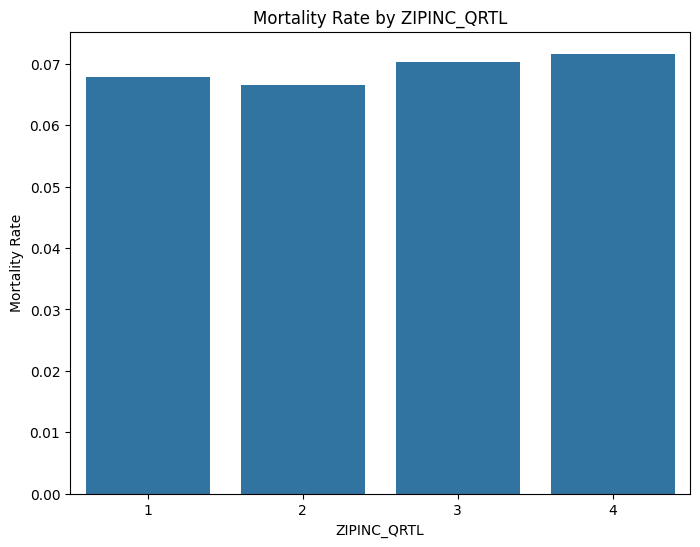

<ipython-input-46-976219579ec5>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_var, y='DIED', data=df, ci=None)


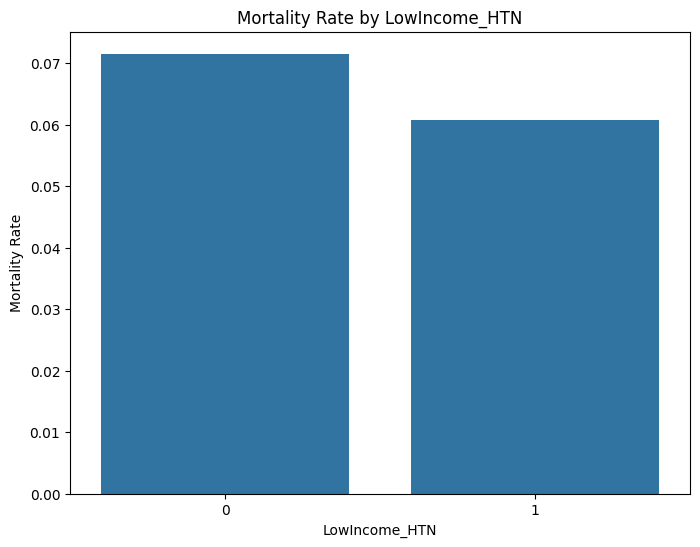

<ipython-input-46-976219579ec5>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_var, y='DIED', data=df, ci=None)


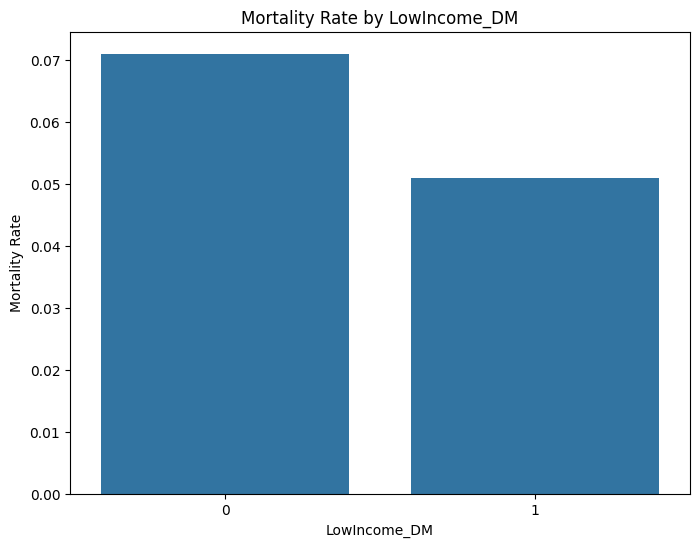

<ipython-input-46-976219579ec5>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_var, y='DIED', data=df, ci=None)


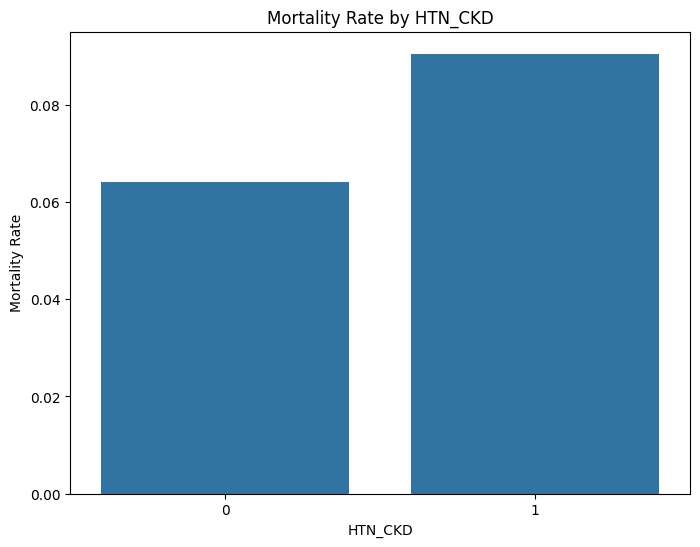

<ipython-input-46-976219579ec5>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_var, y='DIED', data=df, ci=None)


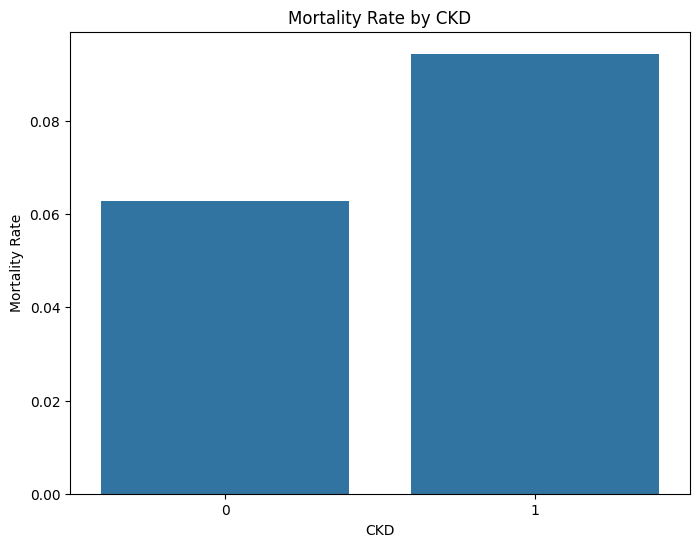

<ipython-input-46-976219579ec5>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_var, y='DIED', data=df, ci=None)


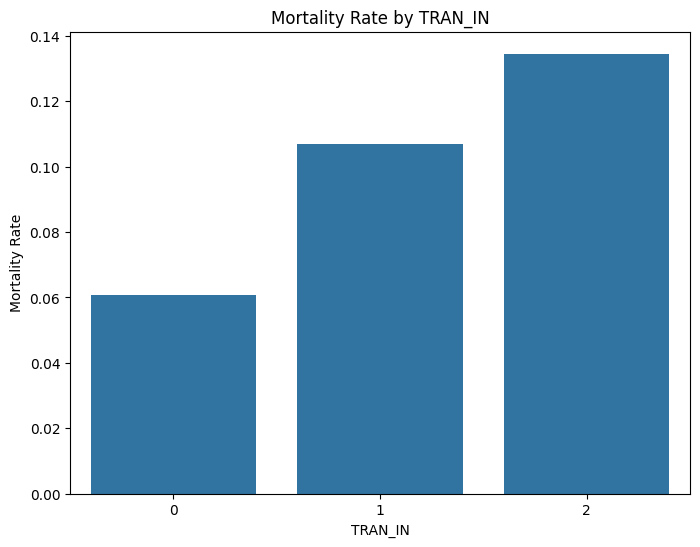

<ipython-input-46-976219579ec5>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_var, y='DIED', data=df, ci=None)


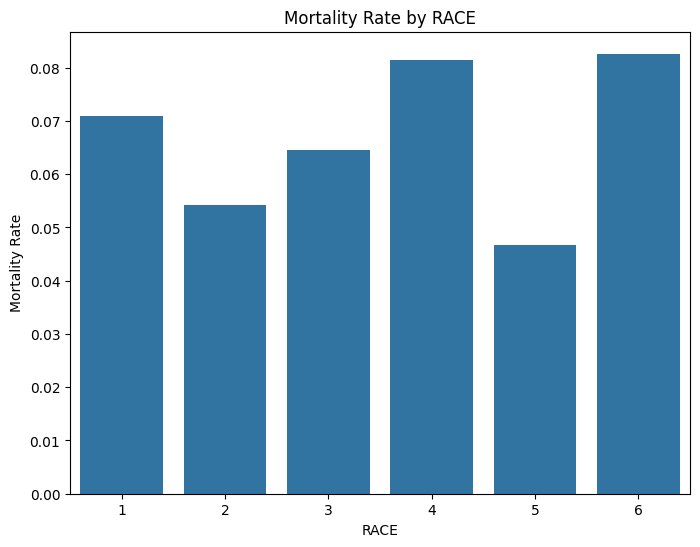

In [46]:
x_var_list = ['ZIPINC_QRTL','LowIncome_HTN','LowIncome_DM','HTN_CKD','CKD','TRAN_IN','RACE']

# Loop through the variables and create bar plots
for x_var in x_var_list:
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    sns.barplot(x=x_var, y='DIED', data=df, ci=None)
    plt.title(f"Mortality Rate by {x_var}")
    plt.xlabel(x_var)
    plt.ylabel("Mortality Rate")
    plt.show()

In [47]:
training_features

['AGE',
 'PAY1',
 'TRAN_IN',
 'ELECTIVE',
 'FEMALE',
 'AMONTH',
 'AWEEKEND',
 'HOSP_DIVISION',
 'PL_NCHS',
 'RACE',
 'HOSP_BEDSIZE',
 'HOSP_LOCTEACH',
 'HOSP_REGION',
 'STROKE',
 'NIHSSREPORT',
 'afib',
 'CHF',
 'DM',
 'HTN',
 'htn_crisis',
 'primary_htn',
 'CKD',
 'oldMI',
 'evtrace',
 'teach',
 'size',
 'smoking',
 'ZIPINC_QRTL',
 'HTN_CKD',
 'AGE_HTN',
 'LowIncome_HTN',
 'LowIncome_DM',
 'age_bin']

In [48]:
training_features.remove('AGE')

In [49]:
x_cols= training_features

In [50]:
y_col

['DIED']

In [51]:
df['age_bin'] = pd.cut(df['AGE'], bins=[0, 40, 60, 80, 120], labels=['<40', '40-60', '60-80', '>80'])
# df= df.drop('AGE',axis =1)

In [52]:
X = df[x_cols].copy()
Y = df[y_col].copy()

In [53]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49926 entries, 0 to 49925
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   DIED    49926 non-null  Int64
dtypes: Int64(1)
memory usage: 438.9 KB


In [54]:
X_train_val,X_test, y_train_val,y_test = train_test_split(X,Y, test_size=0.1, random_state=42, stratify=Y)

In [55]:
x_train, x_val, y_train,y_val = train_test_split(X_train_val,y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

In [56]:
# Explicitly define numeric and categorical columns
numeric_columns = []
categorical_columns = [
    col for col in x_train.columns if col not in numeric_columns
]

# Convert categorical columns to 'category' type
for col in categorical_columns:
    x_train[col] = x_train[col].astype('category')
    x_val[col] = x_val[col].astype('category')

# Preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), numeric_columns)  # Standardize the 'AGE' column
    ],
    remainder='passthrough'  # Leave any unexpected columns unchanged
)

# Apply the preprocessor
x_train_en = preprocessor.fit_transform(x_train)
x_val_en = preprocessor.transform(x_val)
x_test_en = preprocessor.transform(X_test)


In [57]:
print(x_train_en.shape,x_val_en.shape,x_test_en.shape)

(35946, 149) (8987, 149) (4993, 149)


In [ ]:
70, 18, 10

In [58]:
# Train the RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced'  ,random_state=42)
model.fit(x_train_en, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [59]:


# Evaluate the model
y_pred = model.predict(x_val_en)
f1 = f1_score(y_val, y_pred)
print("RF - Classification Report")
print(classification_report(y_val, y_pred))
print(f"F1 Score: {f1}")


RF - Classification Report
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      8367
         1.0       0.22      0.00      0.01       620

    accuracy                           0.93      8987
   macro avg       0.58      0.50      0.49      8987
weighted avg       0.88      0.93      0.90      8987

F1 Score: 0.006359300476947536


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                 Feature  Importance
11       cat__FEMALE_1.0    0.034212
25       cat__AWEEKEND_1    0.028754
34      cat__PL_NCHS_2.0    0.024817
26  cat__HOSP_DIVISION_2    0.023344
23      cat__AMONTH_12.0    0.023002
22      cat__AMONTH_11.0    0.022462
35      cat__PL_NCHS_3.0    0.022333
68    cat__ZIPINC_QRTL_3    0.022305
67    cat__ZIPINC_QRTL_2    0.021561
21      cat__AMONTH_10.0    0.021317


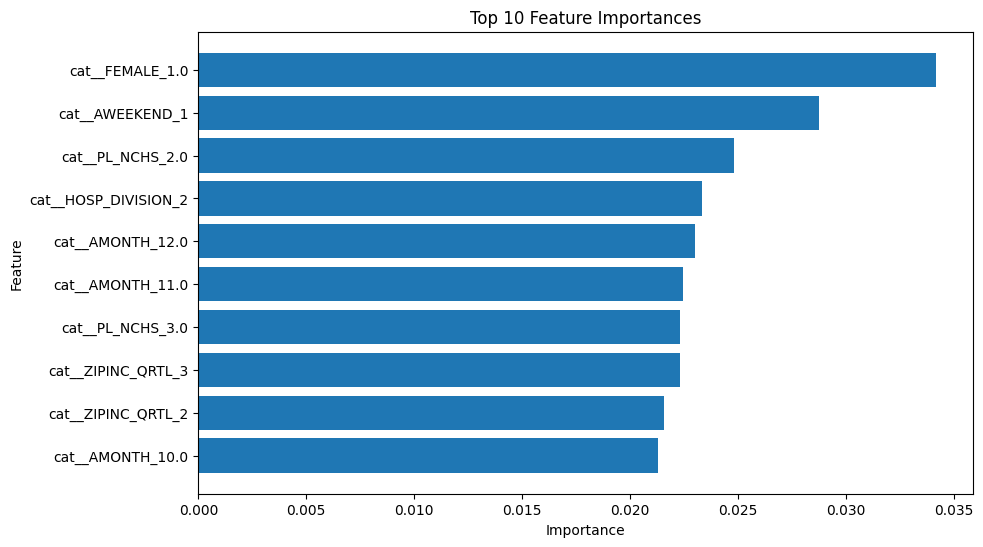

In [60]:


model = RandomForestClassifier(random_state=42)
model.fit(x_train_en, y_train)

# Extract feature importance
feature_importances = model.feature_importances_

# Combine with feature names
feature_names = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(importance_df.head(10))

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [61]:
x_train

,PAY1,TRAN_IN,ELECTIVE,FEMALE,AMONTH,AWEEKEND,HOSP_DIVISION,PL_NCHS,RACE,HOSP_BEDSIZE,HOSP_LOCTEACH,HOSP_REGION,STROKE,NIHSSREPORT,afib,CHF,DM,HTN,htn_crisis,primary_htn,CKD,oldMI,evtrace,teach,size,smoking,ZIPINC_QRTL,HTN_CKD,AGE_HTN,LowIncome_HTN,LowIncome_DM,age_bin
45531,2,0,0,0,8,0,2,2,1,2,3,1,1,0,0,0,0,1,0,1,0,0,1,2,1,0,4,0,56,0,0,40-60
47180,3,1,0,0,10,0,2,2,1,3,3,1,1,0,0,0,0,0,0,0,0,0,1,2,2,0,4,0,0,0,0,40-60
27939,3,1,0,0,12,0,2,4,1,3,3,1,1,1,0,0,1,1,0,1,0,0,1,2,2,0,3,0,65,0,0,60-80
46911,3,1,0,0,9,0,2,3,1,2,3,1,1,0,0,1,0,1,0,0,0,0,1,2,1,0,1,0,58,1,0,40-60
3079,1,0,0,0,12,1,8,5,1,3,1,4,1,0,1,0,1,1,0,1,0,0,1,1,2,0,3,0,84,0,0,>80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602,3,1,0,0,10,0,7,6,1,3,2,3,1,0,0,0,0,0,0,0,0,0,1,1,2,0,1,0,0,0,0,40-60
33535,3,0,0,0,4,0,2,3,1,3,3,1,1,0,0,0,0,1,0,1,0,0,1,2,2,0,2,0,54,0,0,40-60
1363,3,0,0,1,11,1,9,2,6,3,2,4,1,0,0,0,0,0,0,0,0,0,3,1,2,0,4,0,0,0,0,<40
43684,1,0,0,1,6,0,2,2,4,3,2,1,1,0,1,1,0,1,0,0,1,0,3,1,2,0,4,1,83,0,0,>80


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:18:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:18:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:18:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:18:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:18:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84      8367
         1.0       0.12      0.46      0.19       620

    accuracy                           0.73      8987
   macro avg       0.54      0.61      0.52      8987
weighted avg       0.89      0.73      0.80      8987



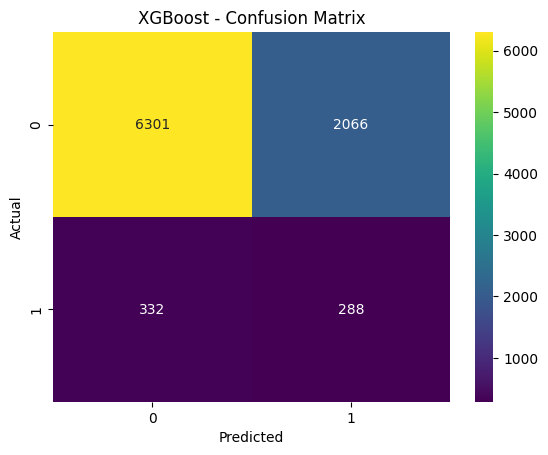

XGBoost - Cross-Validated F1 Scores: [0.18278616 0.19468229 0.19360568 0.2007689  0.20431528]
XGBoost - Mean F1 Score: 0.19523166257772043


In [62]:
# XGBoost with Class Weighting
xgb_model = XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
                          use_label_encoder=False, random_state=42, eval_metric="logloss")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Stratified K-Fold Cross Validation for XGBoost
xgb_cv_scores = cross_val_score(xgb_model, x_train_en, y_train, cv=skf, scoring="f1")

# Train the XGBoost model
xgb_model.fit(x_train_en, y_train)

# Predict on Validation Set with XGBoost
y_pred_xgb = xgb_model.predict(x_val_en)

# XGBoost Evaluation
print("XGBoost - Classification Report")
print(classification_report(y_val, y_pred_xgb))

# Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')
plt.show()

# Print Cross-Validation Scores for XGBoost
print(f"XGBoost - Cross-Validated F1 Scores: {xgb_cv_scores}")
print(f"XGBoost - Mean F1 Score: {np.mean(xgb_cv_scores)}")


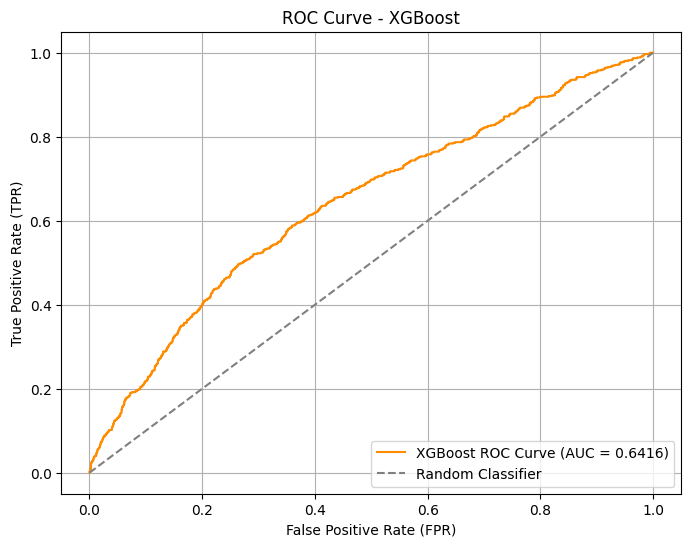

In [68]:
# Predict probabilities for the positive class (DIED = 1)
y_pred_proba_xgb = xgb_model.predict_proba(x_val_en)[:, 1]

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_val, y_pred_proba_xgb)

# Calculate the AUC (Area Under the Curve)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', label=f"XGBoost ROC Curve (AUC = {roc_auc_xgb:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Top Features:
                Feature  Importance
54          cat__afib_1    0.030343
59   cat__primary_htn_1    0.025534
143     cat__AGE_HTN_90    0.020480
55           cat__CHF_1    0.019721
57           cat__HTN_1    0.017856
148    cat__age_bin_>80    0.017429
58    cat__htn_crisis_1    0.017294
66       cat__smoking_1    0.013090
7      cat__TRAN_IN_2.0    0.011932
9     cat__ELECTIVE_1.0    0.011749


<Figure size 1000x800 with 0 Axes>

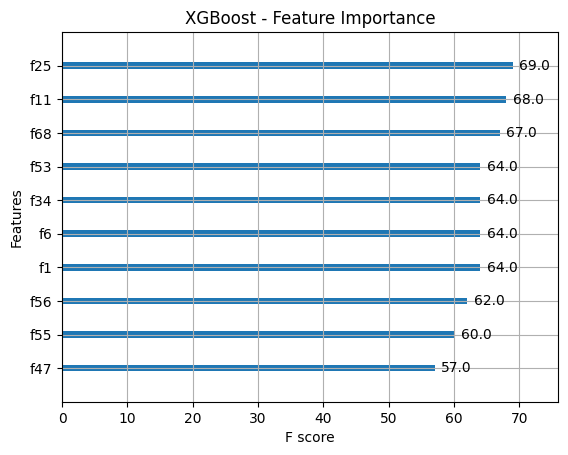

In [64]:

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Combine with feature names
feature_names = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top features
print("Top Features:")
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title("XGBoost - Feature Importance")
plt.show()

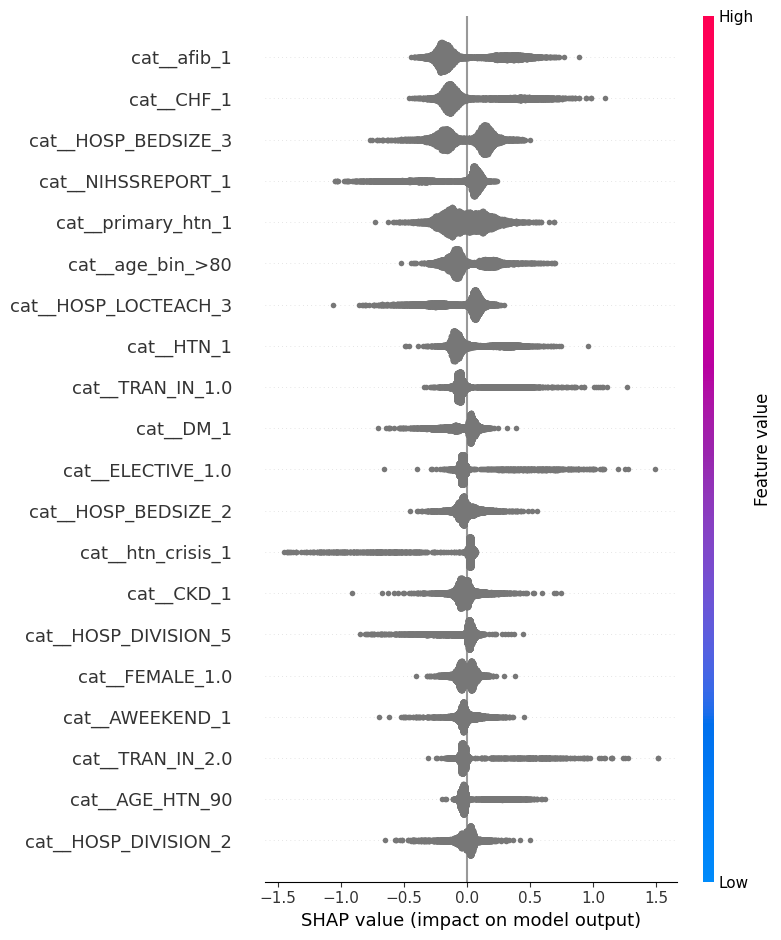

In [65]:
import shap
# Ensure the feature names align with the transformed data
feature_names = preprocessor.get_feature_names_out()

# Verify alignment
assert x_val_en.shape[1] == len(feature_names), "Feature names do not match the transformed data!"

# Initialize SHAP Explainer
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values
shap_values = explainer.shap_values(x_val_en)

# Summary Plot
shap.summary_plot(shap_values, x_val_en, feature_names=feature_names)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Logistic Regression - Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.65      0.78      8367
         1.0       0.12      0.62      0.20       620

    accuracy                           0.65      8987
   macro avg       0.54      0.64      0.49      8987
weighted avg       0.90      0.65      0.74      8987



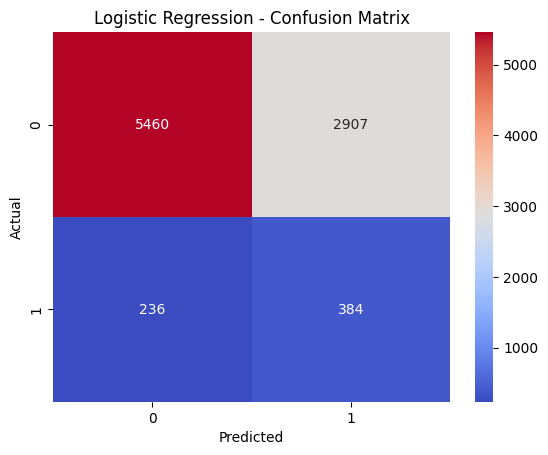

Logistic Regression - Cross-Validated F1 Scores: [0.20032733 0.19993402 0.20383852 0.19955513 0.20271143]
Logistic Regression - Mean F1 Score: 0.20127328471106676


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression with Class Weighting
logreg_model = LogisticRegression(class_weight="balanced", random_state=42, max_iter=500)

# Stratified K-Fold Cross Validation for Logistic Regression
logreg_cv_scores = cross_val_score(logreg_model, x_train_en, y_train, cv=skf, scoring="f1")

# Train the Logistic Regression model
res = logreg_model.fit(x_train_en, y_train)

# Predict on Validation Set with Logistic Regression
y_pred_logreg = logreg_model.predict(x_val_en)

# Logistic Regression Evaluation
print("Logistic Regression - Classification Report")
print(classification_report(y_val, y_pred_logreg))

# Confusion Matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_val, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

# Print Cross-Validation Scores for Logistic Regression
print(f"Logistic Regression - Cross-Validated F1 Scores: {logreg_cv_scores}")
print(f"Logistic Regression - Mean F1 Score: {np.mean(logreg_cv_scores)}")


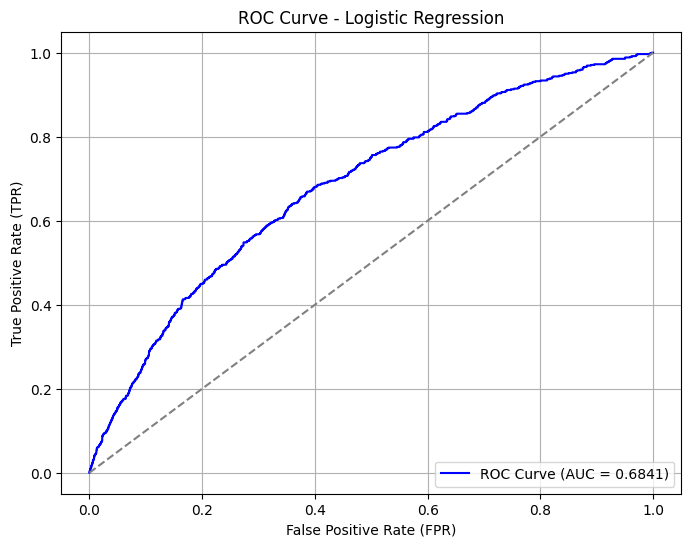

In [67]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_pred_proba = logreg_model.predict_proba(x_val_en)[:, 1]

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill classifier)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP Kernel Explainer (Logistic Regression is a linear model)
explainer = shap.KernelExplainer(logreg_model.predict_proba, x_train_en)

# Compute SHAP values for the validation set
shap_values = explainer.shap_values(x_val_en)

# Summary Plot for SHAP values
shap.summary_plot(shap_values[1], x_val_en, feature_names=preprocessor.get_feature_names_out())


  0%|          | 0/8987 [00:00<?, ?it/s]

In [74]:
### Test data

In [69]:
y_test.DIED.value_counts()

,count
DIED,
0,4648
1,345


In [70]:
y_test.DIED.value_counts()/y_test.shape[0]

,count
DIED,
0,0.930903
1,0.069097


In [71]:
x_test_en.shape

(4993, 149)

In [72]:
y_test_pred_xgb = xgb_model.predict(x_test_en)

              precision    recall  f1-score   support

         0.0       0.95      0.76      0.85      4648
         1.0       0.14      0.51      0.22       345

    accuracy                           0.74      4993
   macro avg       0.55      0.64      0.53      4993
weighted avg       0.90      0.74      0.80      4993



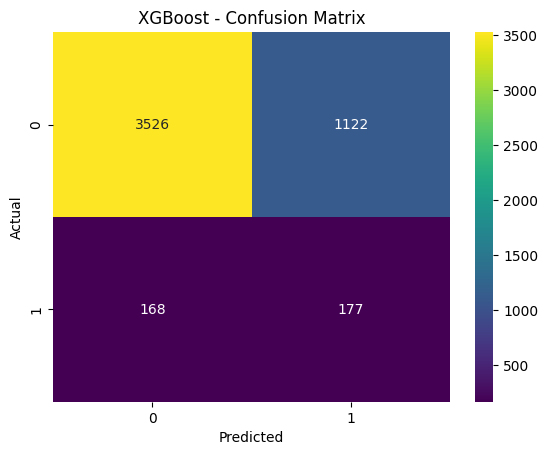

In [73]:
print(classification_report(y_test, y_test_pred_xgb))

# Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')
plt.show()
